Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the california house price data

In [ ]:
house_price_dataset = fetch_california_housing()
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
house_df = pd.DataFrame(house_price_dataset.data, columns= house_price_dataset.feature_names)

In [ ]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# add the target column to the df
house_df["price"] = house_price_dataset.target

In [ ]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Data preprocessing

In [ ]:
house_df.shape

(20640, 9)

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
house_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


Text(0.5, 1.0, 'Distribution of Median house value')

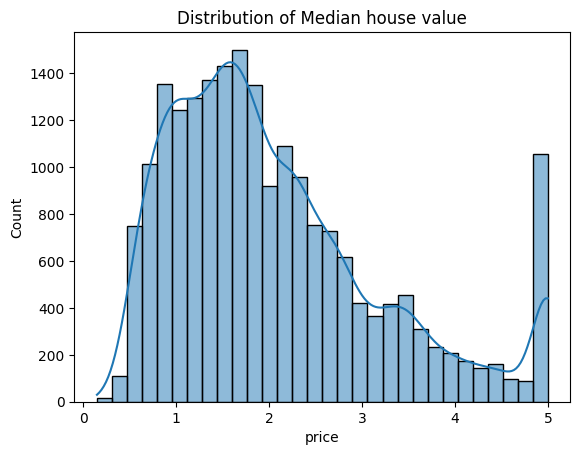

In [ ]:
# target distribution
sns.histplot(house_df["price"], kde=True, bins=30)
plt.title("Distribution of Median house value")

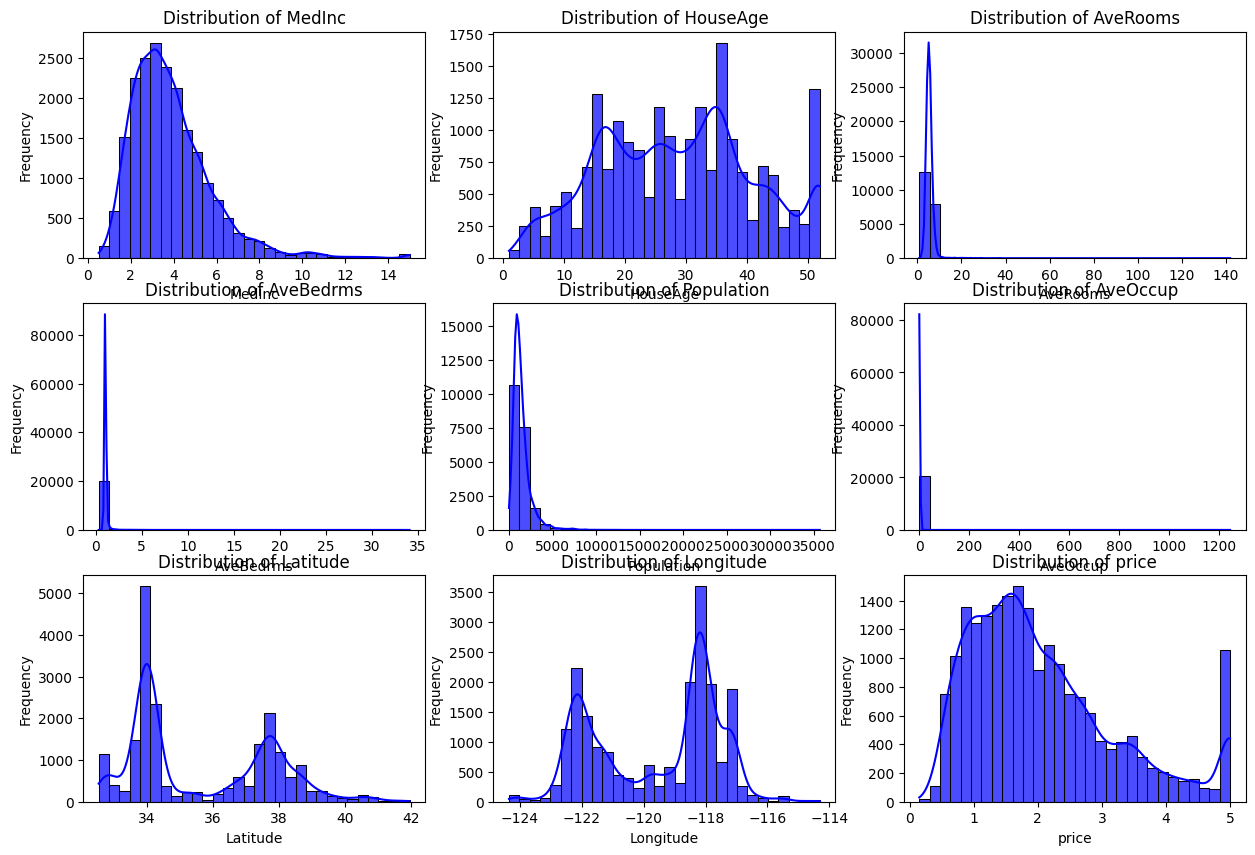

In [ ]:
# feature distribution
features = house_df.columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
  plt.subplot(3, 3, i)
  sns.histplot(house_df[col], kde=True, bins=30, color="blue", alpha=0.7)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")

# plt.tight_layout
plt.show()

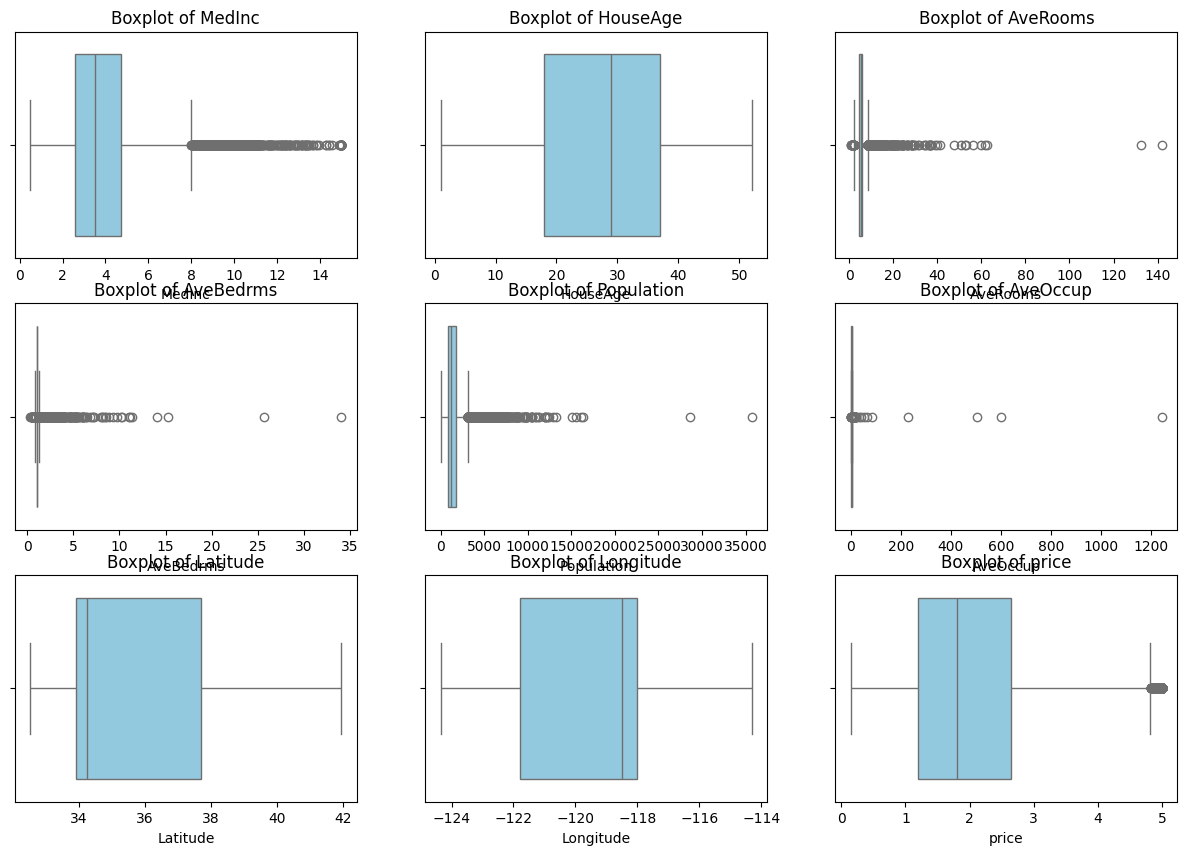

In [ ]:
# boxplot for potential outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x=house_df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)

plt.tight_layout
plt.show()

In [ ]:
skewness = house_df.skew()
print(skewness)

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
price          0.977763
dtype: float64


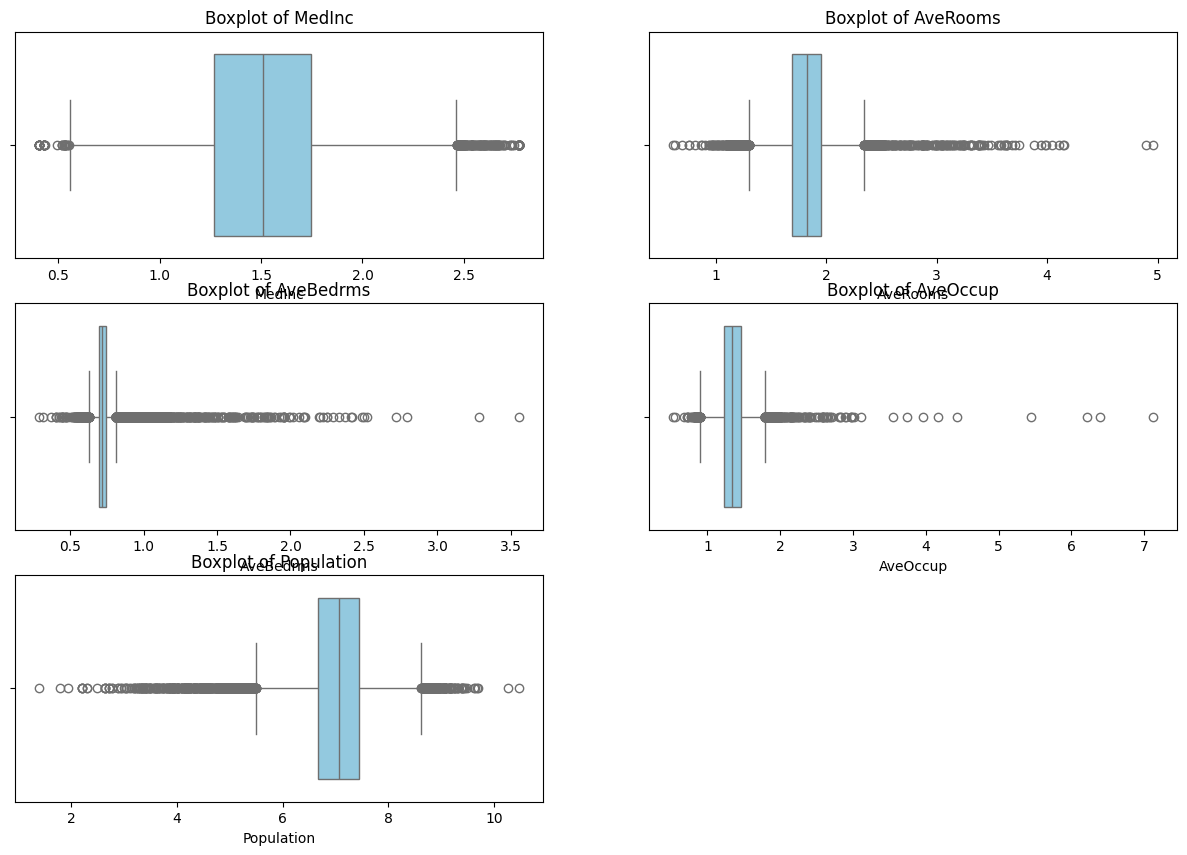

In [ ]:
# adjusting skewness of averooms, avebedrooms, medinc, aveoccup
skewed_features = ["MedInc", "AveRooms", "AveBedrms", "AveOccup", "Population"]
for i in skewed_features:
  house_df[i] = np.log1p(house_df[i])

plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_features, 1):
  plt.subplot(3, 2, i)
  sns.boxplot(x=house_df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)

plt.tight_layout
plt.show()

In [ ]:
skewness = house_df.skew()
print(skewness)

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
price         0.977763
dtype: float64


In [ ]:
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.516995,28.639486,1.828722,0.732035,7.025503,1.351645,35.631861,-119.569704,2.068558
std,0.358677,12.585558,0.231938,0.105412,0.736238,0.207530,2.135952,2.003532,1.153956
min,0.405398,1.000000,0.613104,0.287682,1.386294,0.526093,32.540000,-124.350000,0.149990
25%,1.270715,18.000000,1.693911,0.696182,6.669498,1.232485,33.930000,-121.800000,1.196000
50%,1.511781,29.000000,1.829236,0.717245,7.062192,1.339757,34.260000,-118.490000,1.797000
75%,1.748025,37.000000,1.953365,0.741712,7.453562,1.454481,37.710000,-118.010000,2.647250
max,2.772595,52.000000,4.962209,3.557251,10.482430,7.126355,41.950000,-114.310000,5.000010


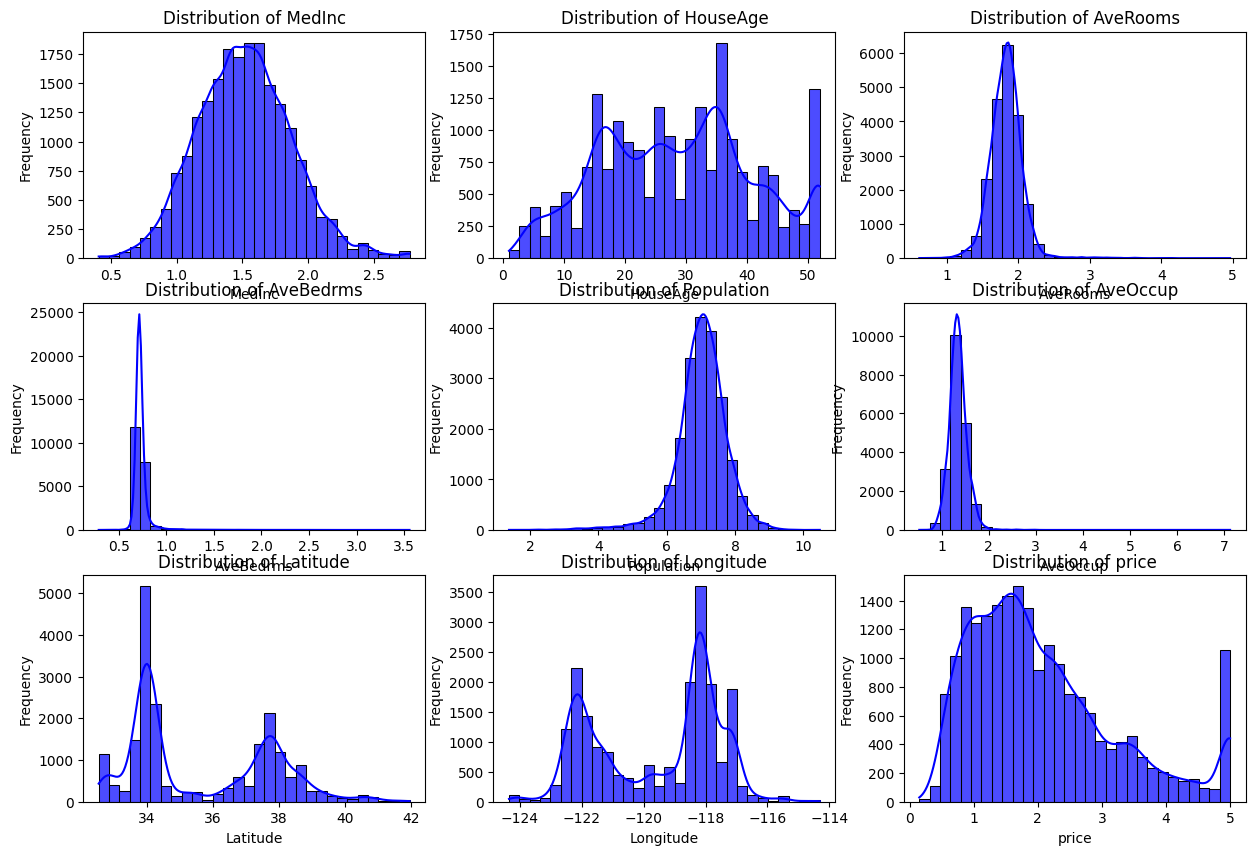

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
  plt.subplot(3, 3, i)
  sns.histplot(house_df[col], kde=True, bins=30, color="blue", alpha=0.7)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")

# plt.tight_layout
plt.show()

Correlation Analysis

<Axes: >

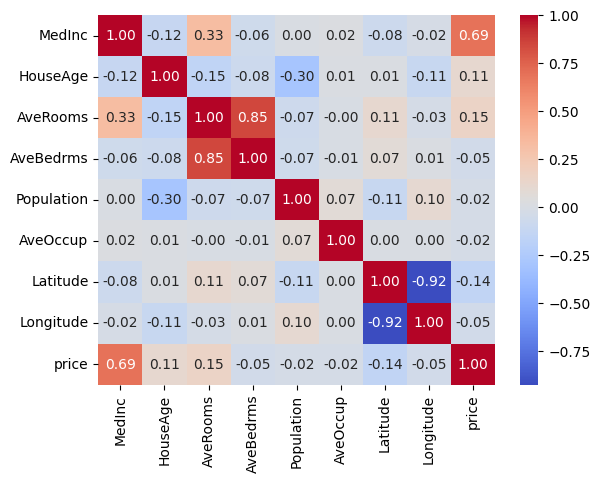

In [ ]:
correlation_matrix = house_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

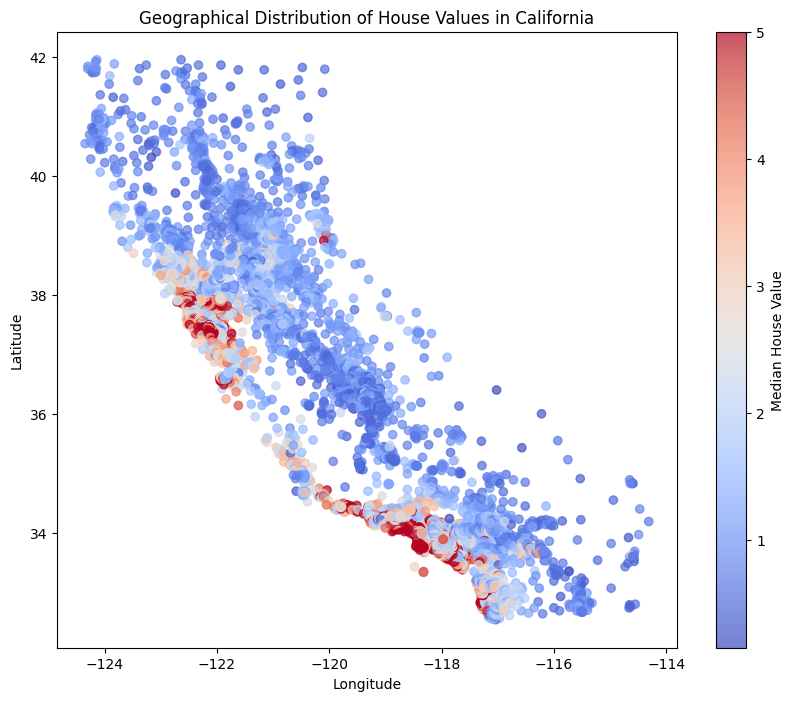

In [ ]:
# scatterplot of geospatial features relative to pricing
plt.figure(figsize=(10, 8))
plt.scatter(house_df['Longitude'], house_df['Latitude'], c=house_df['price'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of House Values in California')
plt.show()

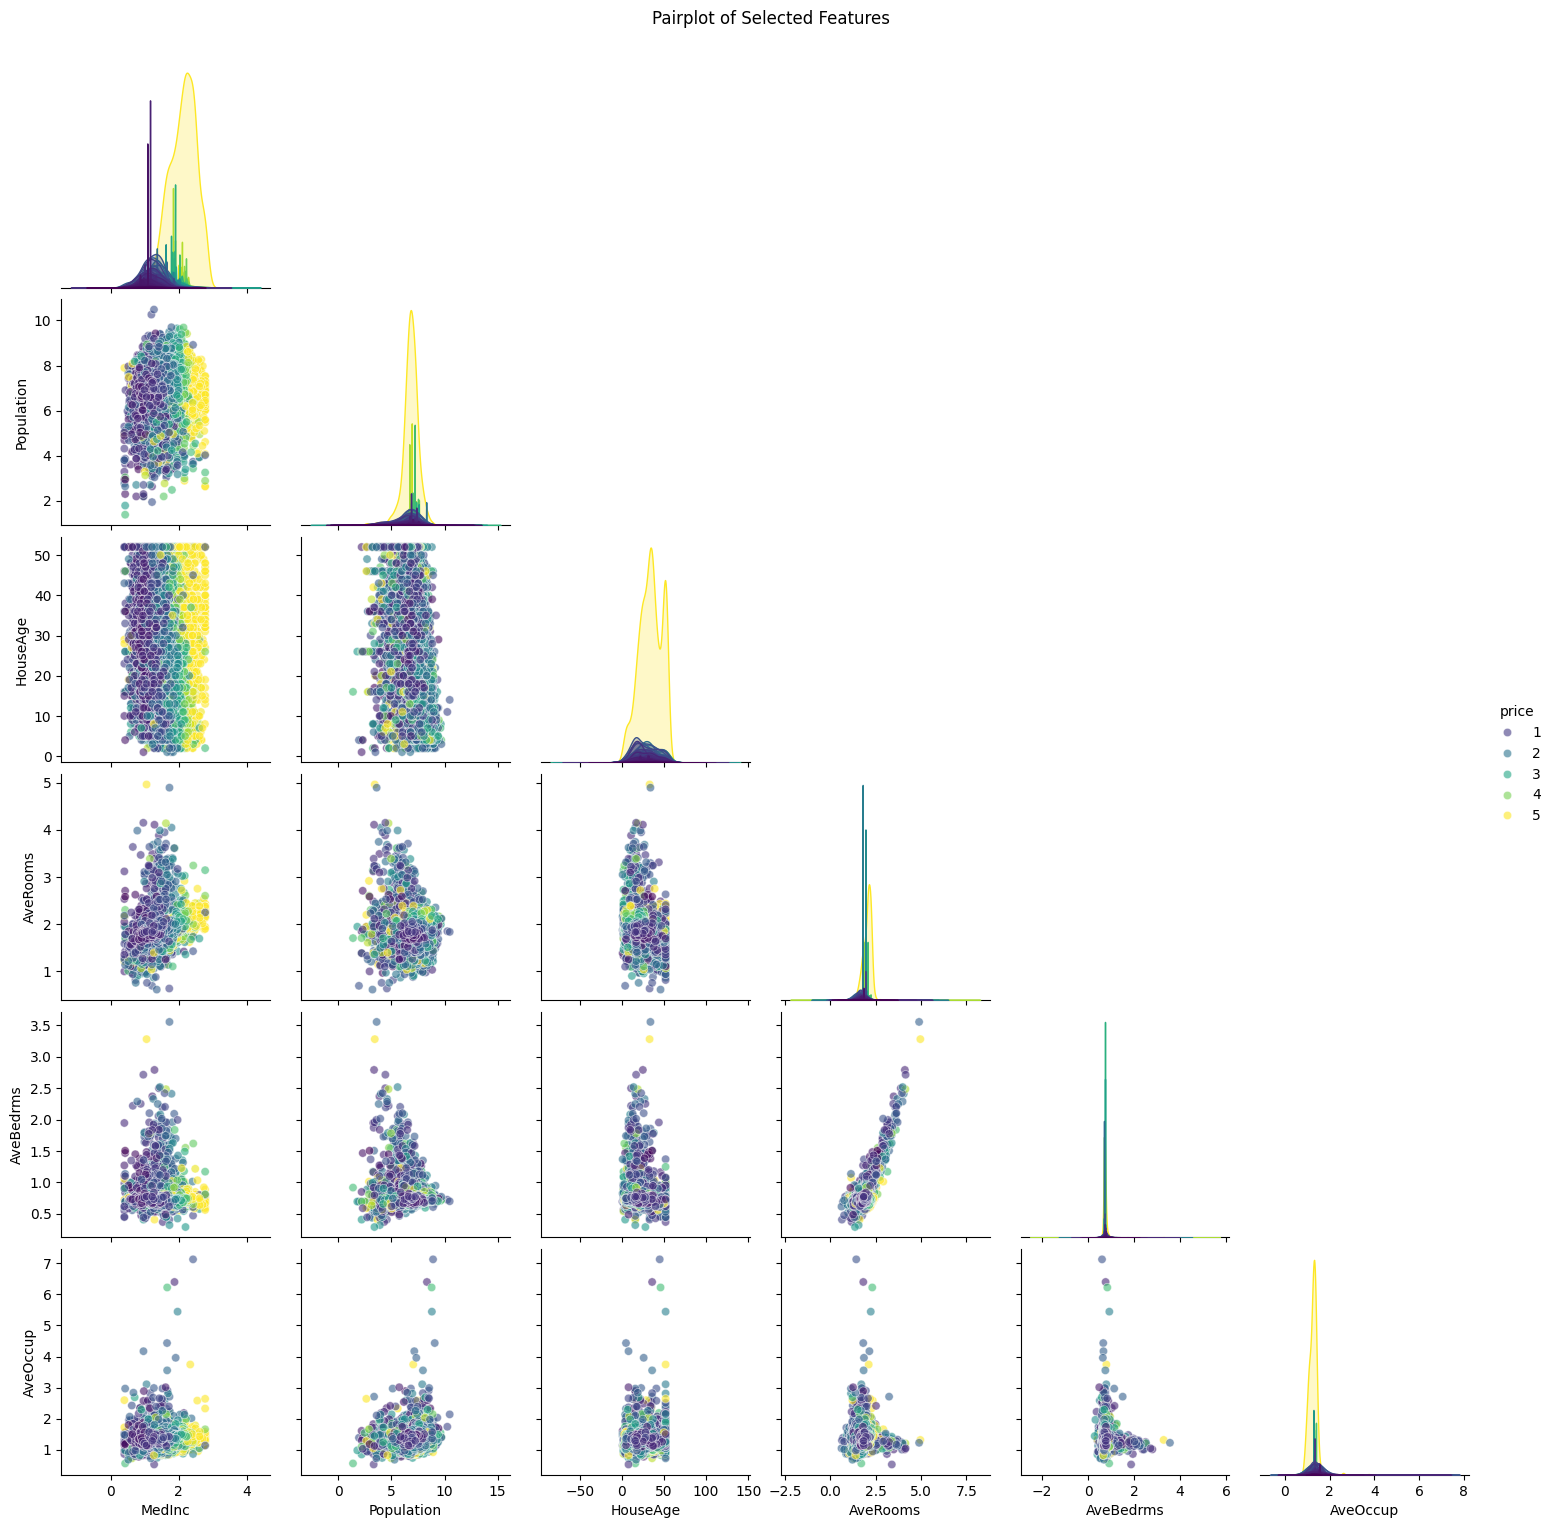

In [ ]:
# a pairplot to see all features relationships
features = ['MedInc', 'Population', 'HouseAge', "price", 'AveRooms', "AveBedrms", 'AveOccup']

# Create the pairplot
sns.pairplot(house_df[features], diag_kind='kde', hue="price", corner=True, palette="viridis", height=2.5, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

Feature engineering

In [ ]:
from sklearn.metrics.pairwise import haversine_distances

# Convert to radians for haversine formula
lat_lon = np.radians(house_df[['Latitude', 'Longitude']])
la_coords = np.radians([[34.0522, -118.2437]])  # Los Angeles
sf_coords = np.radians([[37.7749, -122.4194]])  # San Francisco

# Add new features
house_df['Distance_to_LA'] = haversine_distances(lat_lon, la_coords)[:, 0] * 6371  # Earth radius in km
house_df['Distance_to_SF'] = haversine_distances(lat_lon, sf_coords)[:, 0] * 6371

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(house_df[['MedInc', 'Latitude', 'Longitude', 'Distance_to_LA', 'Distance_to_SF']])
house_df[['MedInc', 'Latitude', 'Longitude', 'Distance_to_LA', 'Distance_to_SF']] = scaled_features

Splitting the data

In [ ]:
X = house_df[["MedInc", "Latitude", "Longitude", "Distance_to_LA", "Distance_to_SF"]]
Y = house_df["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model Selection

Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

r_reg = Ridge(alpha=1.0, random_state=42)
r_reg.fit(X_train, Y_train)

Ridge(random_state=42)

In [ ]:
X_train_prediction = r_reg.predict(X_train)
r2_train = r2_score(Y_train, X_train_prediction)
mse = mean_squared_error(Y_train, X_train_prediction)
print(f"R squared error on training data is : {r2_train}")
print(f"Mean squared error on training data is: {mse}")

R squared error on training data is : 0.5914289499298517
Mean squared error on training data is: 0.5461688777017012


In [ ]:
X_test_prediction = r_reg.predict(X_test)
r2_test = r2_score(Y_test, X_test_prediction)
mse = mean_squared_error(Y_test, X_test_prediction)
print(f"R squared error on test data is : {r2_test}")
print(f"Mean squared error on test data is: {mse}")

R squared error on test data is : 0.5753422070818266
Mean squared error on test data is: 0.5564753845199392


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
X_train_prediction = rf.predict(X_train)
r2_train = r2_score(Y_train, X_train_prediction)
mse = mean_squared_error(Y_train, X_train_prediction)
print(f"R squared error on training data is : {r2_train}")
print(f"Mean squared error on training data is: {mse}")

R squared error on training data is : 0.9764753958674662
Mean squared error on training data is: 0.03144717824534272


In [ ]:
X_test_prediction = rf.predict(X_test)
r2_test = r2_score(Y_test, X_test_prediction)
mse = mean_squared_error(Y_test, X_test_prediction)
print(f"R squared error on test data is : {r2_test}")
print(f"Mean squared error on test data is: {mse}")

R squared error on test data is : 0.8255582198261412
Mean squared error on test data is: 0.22859007492015


XGBoost

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_train_prediction = xgb.predict(X_train)
r2_train = r2_score(Y_train, X_train_prediction)
mse = mean_squared_error(Y_train, X_train_prediction)
print(f"R squared error on training data is : {r2_train}")
print(f"Mean squared error on training data is: {mse}")

R squared error on training data is : 0.9150681789378196
Mean squared error on training data is: 0.11353500788352117


In [ ]:
X_test_prediction = xgb.predict(X_test)
r2_test = r2_score(Y_test, X_test_prediction)
mse = mean_squared_error(Y_test, X_test_prediction)
print(f"R squared error on test data is : {r2_test}")
print(f"Mean squared error on test data is: {mse}")

R squared error on test data is : 0.8322235037525575
Mean squared error on test data is: 0.21985582702044928


Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

models = [Ridge(alpha=1.0, random_state=42), RandomForestRegressor(n_estimators=100, random_state=42), XGBRegressor()]


In [ ]:
def cross_val_default():
  for model in models:
    cv_score = cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=5)
    mean_score = np.mean(np.abs(cv_score))
    print("Cross Validation scores for", model, " are ", cv_score)
    print("Mean scores for ", model, " is ", mean_score)

In [ ]:
cross_val_default()

Cross Validation scores for Ridge(random_state=42)  are  [-0.46200593 -0.64661011 -0.65987252 -0.59969183 -0.50284468]
Mean scores for  Ridge(random_state=42)  is  0.5742050142396685
Cross Validation scores for RandomForestRegressor(random_state=42)  are  [-0.55362329 -0.45068101 -0.5421316  -0.64647396 -0.79620335]
Mean scores for  RandomForestRegressor(random_state=42)  is  0.5978226432146256
Cross Validation scores for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=

Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

models_list = ["Ridge", "RandomForest", "XGBoost"]
hyperparams = {
    "Ridge": {
        "alpha": [0.01, 0.1, 1.0, 10.0],
        "solver": ["auto", "saga"]
    },
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [4, 6, 7]
    }
}

def cross_val_tuning(models, hyperparams):
  result = []
  i = 0

  for model in models:
    model_name = models_list[i]
    model_hyperparams = hyperparams[model_name]
    classifier = GridSearchCV(model, model_hyperparams, cv=5, scoring='neg_mean_squared_error')
    classifier.fit(X_train, Y_train)
    result.append({
        "model": model_name,
        "best_params": classifier.best_params_,
        "best_score": classifier.best_score_
    })
    i += 1

  result = pd.DataFrame(result, columns=["model", "best_params", "best_score"])
  return result

In [ ]:
cross_val_tuning(models, hyperparams)

,model,best_params,best_score
0,Ridge,"{'alpha': 1.0, 'solver': 'saga'}",-0.546552
1,RandomForest,"{'max_depth': None, 'min_samples_split': 5, 'n...",-0.230617
2,XGBoost,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",-0.224044


from matplotlib import pyplot as plt
_df_0['best_score'].plot(kind='hist', bins=20, title='best_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['best_score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'best_score'}, axis=1)
              .sort_values('best_score', ascending=True))
  xs = counted['best_score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('best_score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('best_score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['best_score'].plot(kind='line', figsize=(8, 4), title='best_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='best_score', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Model Evaluation

In [ ]:
# best parameters for Ridge
best_ridge_params = {
    "alpha": 1.0,
    "solver": "saga"
}

# best parameters for random forest
best_rf_params = {
    "max_depth": None,
    "min_samples_split": 5,
    "n_estimators": 200
}

# best parameters for xgb
best_xgb_params = {
    "learning_rate": 0.2,
    "max_depth": 6,
    "n_estimators": 200
}

tuned_models = [Ridge(alpha=1.0, solver="saga", random_state=42), RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=5, random_state=42), XGBRegressor(learning_rate=0.2, max_depth=6, n_estimators=200)]

def compare_test_scores():
  for model in tuned_models:
    model.fit(X_train, Y_train)
    X_test_prediction = model.predict(X_test)
    mae = mean_squared_error(Y_test, X_test_prediction)
    print("Mean squared error on test data with tuned hyperparameters for", model, " is ", mae)

In [ ]:
compare_test_scores()

Mean squared error on test data with tuned hyperparameters for Ridge(random_state=42, solver='saga')  is  0.5564745055386642
Mean squared error on test data with tuned hyperparameters for RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42)  is  0.2256081604217423
Mean squared error on test data with tuned hyperparameters for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=Non